In [7]:
from matplotlib import animation
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%run data_gen_script.py

In [1]:
from TA_utils import uniform_load

In [ ]:
load = 1
n_elem = 5
t_sim = 4
h = .1
times =  np.arange(0, t_sim + h, h)
BCs = [0, 1]
f = uniform_load(load, n_elem, times, BCs)

In [3]:
with open('./simulations/sine_simul1.txt', 'w') as outfile:
    np.savetxt(outfile, data, fmt='%-7.2e')

In [2]:
data = np.loadtxt('./simulations/s2_cantilever_EIz_4.txt')

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0,1,10)
    y = np.zeros(10)
    y[1:10] = data[i, 0:9] 
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

writer = animation.PillowWriter
writer.setup(writer,fig, 'movie')

In [ ]:
from IPython.display import display, clear_output

fig, ax = plt.subplots()
l, = ax.plot([0,1.5],[-3,3])

x = np.linspace(0,1,10)
y = np.zeros((36001,10))
y[:, 1:10] = data[:, 0:9] 

animate = lambda i: l.set_data(x, y[i, :]*10)

for i in range(0,2020):
    animate(i)
    clear_output(wait=True)
    display(fig)
    print(i)
    
plt.show()

In [3]:
dof_measured

array([ 4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])

In [33]:
%run experiment_LSTM.py

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
Train for 300 steps, validate for 50 steps
Epoch 1/30
296/300 [============================>.] - ETA: 0s - loss: 0.8679 - coeff_determination: 0.1246 - mean_squared_error: 0.8682 - root_mean_squared_error: 0.9318 - mean_absolute_error: 0.8044
Epoch 00001: val_loss improved from inf to 0.50283, saving model to checkpoint.keras
300/300 [==============================] - 5s 17ms/step - loss: 0.8632 - coeff_determination: 0.1293 - mean_squared_error: 0.8634 - root_mean_squared_error: 0.9292 - mean_absolute_error: 0.801

Epoch 13/30
296/300 [============================>.] - ETA: 0s - loss: 0.0101 - coeff_determination: 0.9898 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 - mean_absolute_error: 0.0773
Epoch 00013: val_loss improved from 0.01010 to 0.00984, saving model to checkpoint.keras
300/300 [==============================] - 3s 11ms/step - loss: 0.0101 - coeff_determination: 0.9898 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 - mean_absolute_error: 0.0774 - val_loss: 0.0098 - val_coeff_determination: 0.9892 - val_mean_squared_error: 0.0098 - val_root_mean_squared_error: 0.0992 - val_mean_absolute_error: 0.0770
Epoch 14/30
296/300 [============================>.] - ETA: 0s - loss: 0.0097 - coeff_determination: 0.9902 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 - mean_absolute_error: 0.0761
Epoch 00014: val_loss improved from 0.00984 to 0.00961, saving model to checkpoint.keras
300/300 [==============================] - 3s 12ms/step - loss: 0.00

Epoch 26/30
296/300 [============================>.] - ETA: 0s - loss: 0.0084 - coeff_determination: 0.9915 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919 - mean_absolute_error: 0.0713
Epoch 00026: val_loss improved from 0.00865 to 0.00856, saving model to checkpoint.keras
300/300 [==============================] - 3s 11ms/step - loss: 0.0084 - coeff_determination: 0.9915 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919 - mean_absolute_error: 0.0714 - val_loss: 0.0086 - val_coeff_determination: 0.9905 - val_mean_squared_error: 0.0086 - val_root_mean_squared_error: 0.0925 - val_mean_absolute_error: 0.0721
Epoch 27/30
296/300 [============================>.] - ETA: 0s - loss: 0.0084 - coeff_determination: 0.9915 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919 - mean_absolute_error: 0.0714
Epoch 00027: val_loss improved from 0.00856 to 0.00856, saving model to checkpoint.keras

Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.001.
300

In [35]:
data = np.loadtxt('./simulations/s4_cantilever_Tip_sine_load.txt')
mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std

In [36]:
#Ad noise to input

SNR = 10

noise = np.random.normal(0, np.mean(std)/SNR, (np.shape(data)[0], np.shape(data)[1]-1))
data[:,:-1] += noise

In [37]:
from KERAS_utils import prepare_data
x_train_uni_rnd, y_train_uni_rnd = prepare_data(data, loc_sg,
                                           0, None,
                                           univariate_past_history,
                                           univariate_future_target)

y_pred_rnd = model.predict(x_train_uni_rnd)

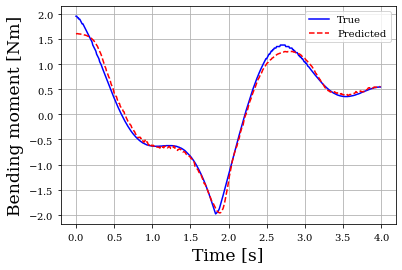

In [38]:
f = plt.figure()

# Plot and compare the two signals.
plt.plot(np.arange(400)*.01,y_train_uni_rnd[100:500], 'b', label='True')
plt.plot(np.arange(400)*.01,y_pred_rnd[100:500], 'r--', label= 'Predicted')

# Plot labels etc.
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Bending moment [Nm]')
plt.show()
f.savefig("pred_2unit_sinetipload_snr10.png", bbox_inches='tight', dpi=600)

In [34]:
xline = np.zeros(10)
for i in np.arange(xline.shape[0]):
    xline[i] = x_train_uni_rnd[i][-1]

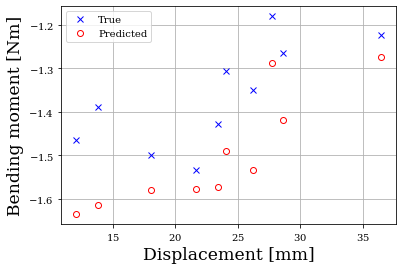

In [25]:
f = plt.figure()
i=4 #sensor at midspan
xline = xline*std[i]+mean[i]
span = np.arange(80,91)
# Plot and compare the two signals.
plt.plot(xline*1000,y_train_uni_rnd[0:10], 'bx', label='True')
plt.plot(xline*1000, y_pred_rnd[0:10], 'ro', label= 'Predicted', fillstyle='none')

# Plot labels etc.
plt.legend()
plt.xlabel('Displacement [mm]')
plt.ylabel('Bending moment [Nm]')
plt.show()
f.savefig("IO_2units_SNR10.png", bbox_inches='tight', dpi=600)

In [11]:
data.shape

(36001, 11)

In [9]:
y_pred = model.predict(x_val_uni)

In [25]:
x_val_uni.shape

(7151, 50, 1)

In [26]:
x_train_uni.shape

(28750, 50, 1)

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [6]:
from random import gauss

In [63]:
dataset = np.loadtxt('./simulations/s4_cantilever_Tip_sine_load.txt')
nbr_tsteps = np.size(dataset, 0)

#noise = np.random.normal(0, 1, np.shape(dataset))
#dataset+=noise
    

TRAIN_SPLIT = int(.8 * nbr_tsteps)
TEST_SPLIT = int(nbr_tsteps - TRAIN_SPLIT)
#nbr_val   = int(.9 * nbr_tsteps)
#ipdb.set_trace()
mean = dataset[:TRAIN_SPLIT].mean(axis=0)
dataset -= mean
std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset /= std

univariate_past_history = 50 
univariate_future_target = 0

SNR = 10

noise = np.random.normal(0, np.mean(std)/SNR, (np.shape(dataset)[0], np.shape(dataset)[1]-1))
dataset[:,:-1] += noise

loc_sg = [5] #[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

x_train_uni, y_train_uni = prepare_data(dataset, loc_sg,
                                           0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)

x_val_uni, y_val_uni = prepare_data(dataset, loc_sg,
                                       TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

y_pred = model.predict(x_val_uni)

In [64]:
model.evaluate(x_val_uni, y_val_uni, batch_size=256)

7151/7151 [==============================] - 0s 21us/sample - loss: 2.5643e-04 - coeff_determination: 0.9997


[0.00025642638383946355, 0.99971855]

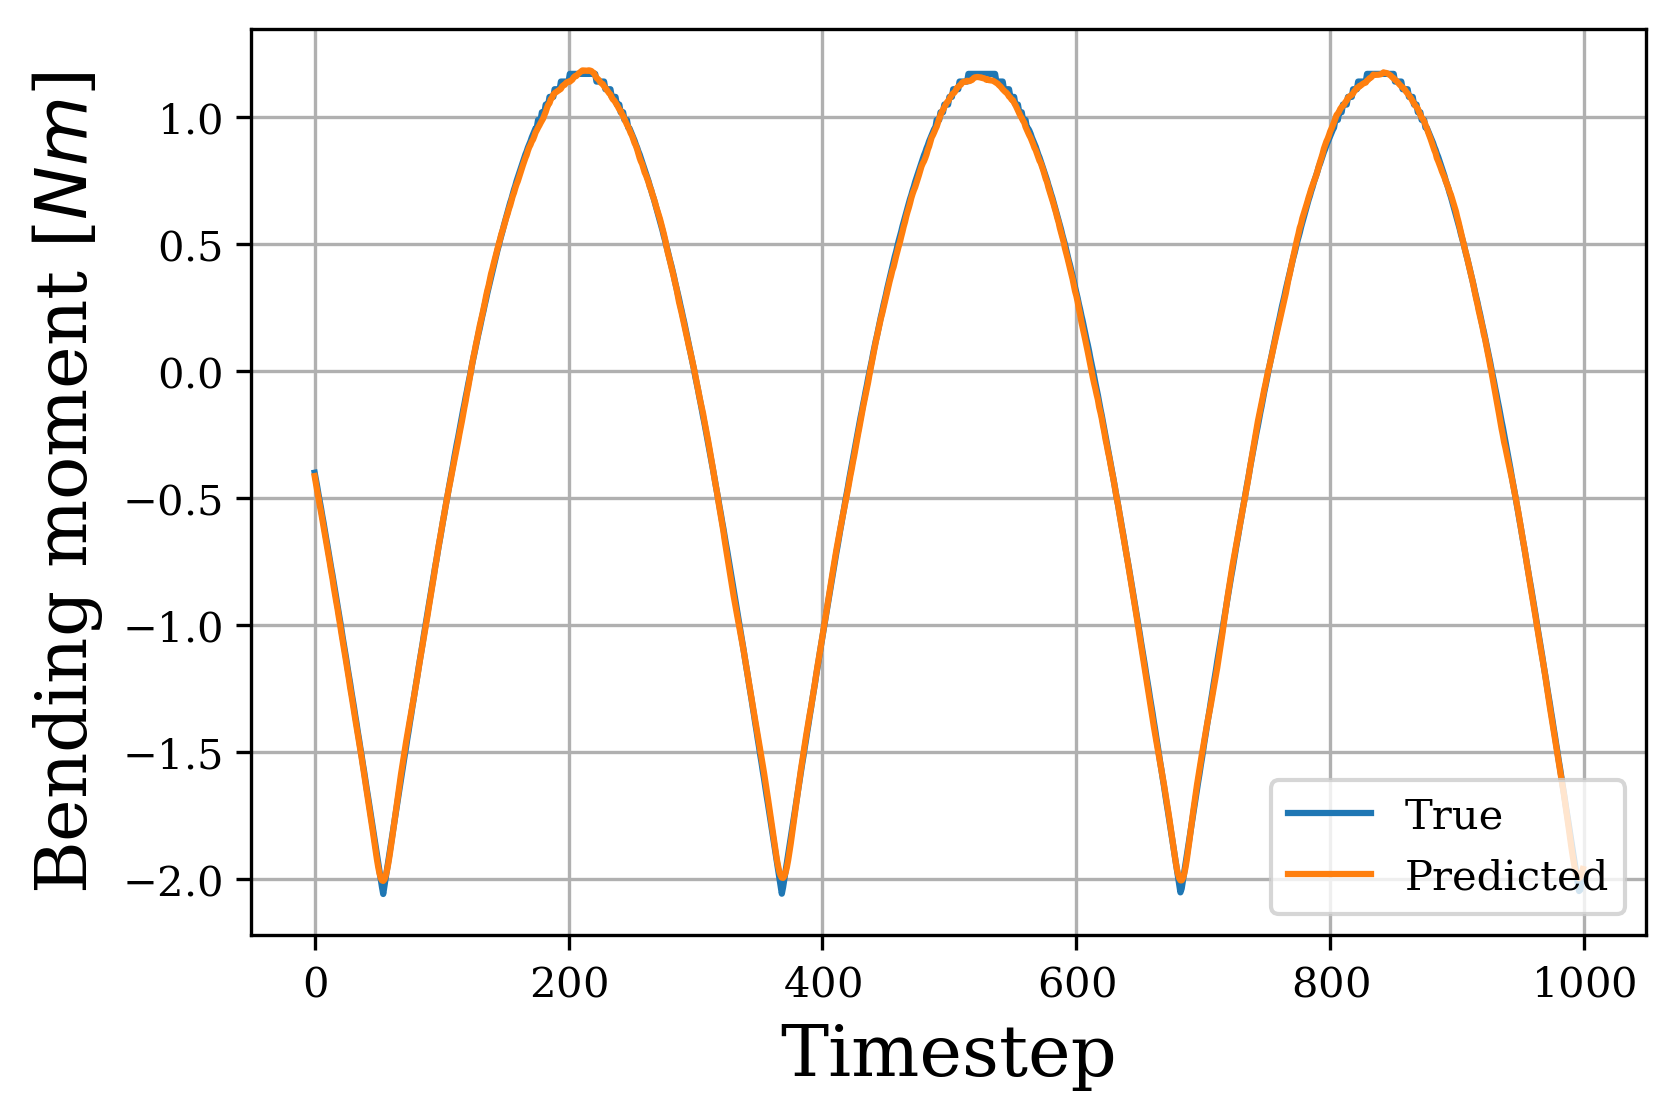

In [58]:
# Plot and compare the two signals.
plt.plot(y_val_uni[0:1000], label='True')
plt.plot(y_pred[0:1000], label='Predicted')
        
# Plot labels etc.
plt.legend()
plt.ylabel('Bending moment [$Nm$]')
plt.xlabel('Timestep')
plt.show()

In [2]:
from KERAS_utils import prepare_data

In [3]:
x_train_uni_rnd, y_train_uni_rnd = prepare_data(dataset, loc_sg,
                                           0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
y_pred_rnd = model.predict(x_train_uni_rnd)
# Plot and compare the two signals.
plt.plot(y_train_uni_rnd[-1000:], label='true')
plt.plot(y_pred_rnd[-1000:], label='pred')
        
# Plot labels etc.
plt.legend()
plt.show()

NameError: name 'dataset' is not defined

In [75]:
data = np.loadtxt('./simulations/simul1.txt')

In [1]:
np.linspace(.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a2b72c250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a2b6eec90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a2b6fec90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9a2b6f5710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a2b6f5c10>,
 'means': []}

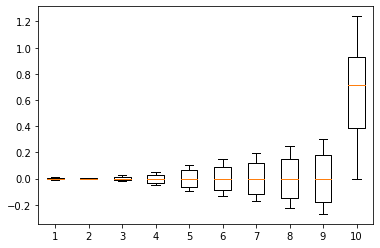

In [10]:
plt.boxplot(data)

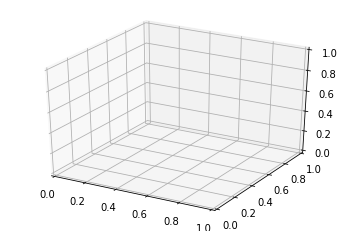

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

In [14]:
%matplotlib notebook

[[-0.07985632 -0.26895399 -0.50207322]
 [ 0.01527662  0.05146666  0.09609448]]
[1 1 1 ... 1 1 1]


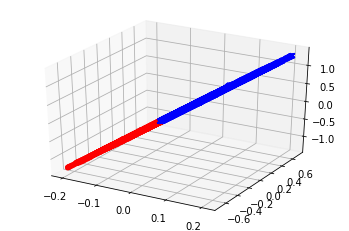

In [9]:
%run clustering_script.py

In [2]:
X_train = X_train.transpose()

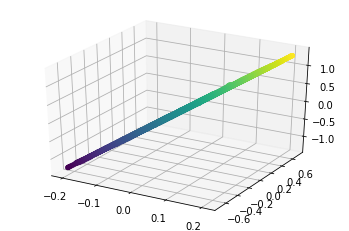

In [4]:
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,2], linewidth=0.5);